In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
df = pd.read_csv(DATASET_URL)
df
# We import the libraries we will use in data analysis, 
# and create the data frame by importing the csv file

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
# Let's look at the dataframe information to see what type of data it contains and how many values are empty
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
# before starting with clustering we are going to implement data cleaning and data preprocessing
#by operating on the copy of the dataframe so as not to overwrite the original data
df_copy = df.copy()

In [4]:
# as a first step we replace the empty values with the average values and then we do a check
replace_with = df_copy.mean(numeric_only=True)
df_copy = df_copy.fillna(replace_with)
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
# as a second step we drop the ID column
df_copy = df_copy.drop('CUST_ID', axis=1)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# observing the distribution we can notice that it is not symmetrical, 
#so let's implement the normalization and then we do a check
df_norm = (df_copy - df_copy.min()) / (df_copy.max() - df_copy.min())
df_norm


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [8]:
df_norm.min()

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [9]:
df_norm.max()

BALANCE                             1.0
BALANCE_FREQUENCY                   1.0
PURCHASES                           1.0
ONEOFF_PURCHASES                    1.0
INSTALLMENTS_PURCHASES              1.0
CASH_ADVANCE                        1.0
PURCHASES_FREQUENCY                 1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY              1.0
CASH_ADVANCE_TRX                    1.0
PURCHASES_TRX                       1.0
CREDIT_LIMIT                        1.0
PAYMENTS                            1.0
MINIMUM_PAYMENTS                    1.0
PRC_FULL_PAYMENT                    1.0
TENURE                              1.0
dtype: float64

In [10]:
# We use the elbow method to define the number of clusters k
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme()
RANDOM_SEED = 1

In [11]:
def plot_ssd_curve(data):
            
    ssd = {}
    for k in range(1, 10):
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED, n_init=10).fit(data)
        ssd[k] = kmeans.inertia_ # somma istanze al quadrato

    plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
    plt.title('Elbow Method', fontsize=20, loc='center')
    plt.xlabel("Numero di cluster", fontsize=16)
    plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
    plt.show()

In [12]:
# we transform the dataframe into array to observe the graph
X = df_norm.values
X

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

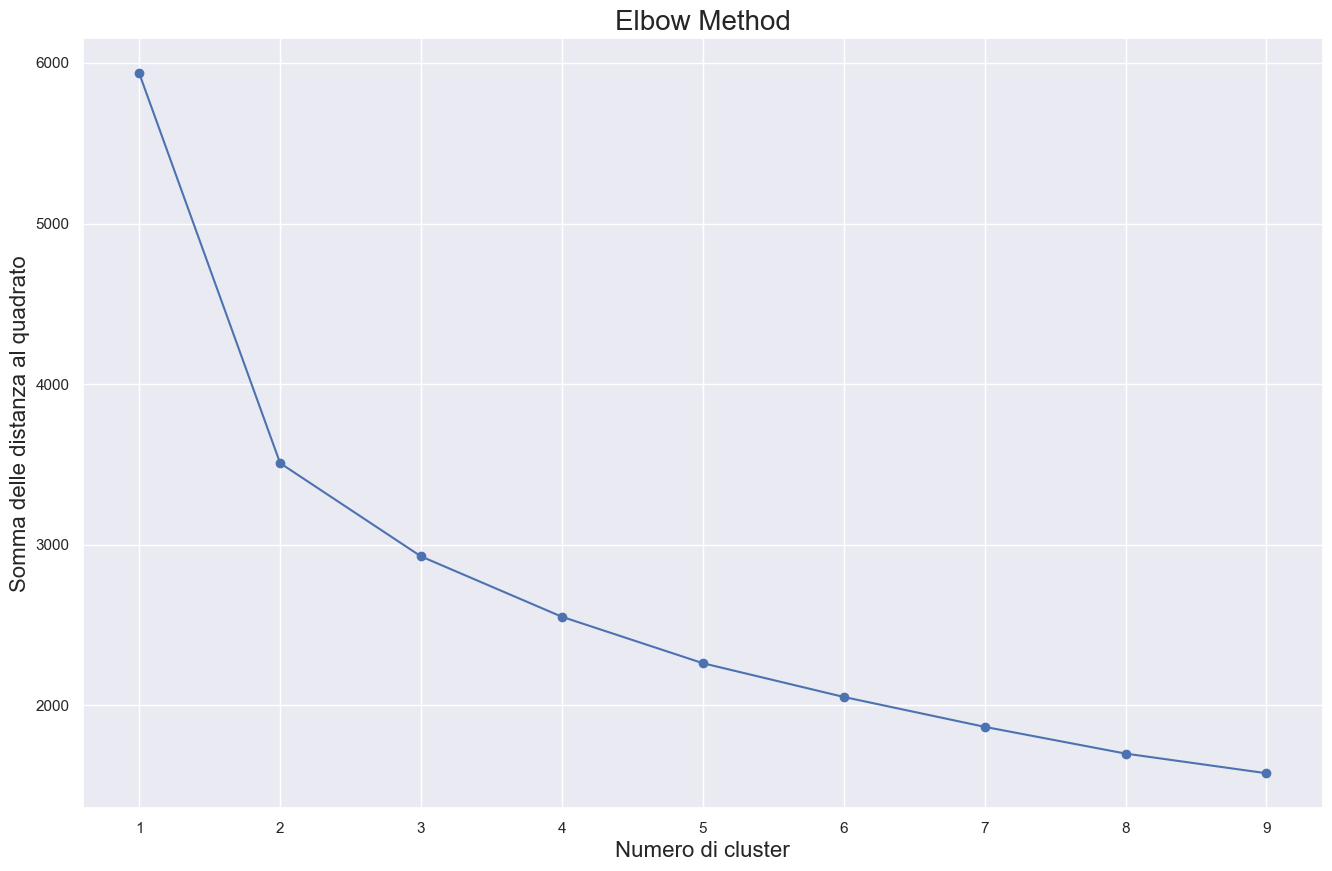

In [13]:
plot_ssd_curve(X)

In [14]:
# We can observe that the ideal number of k is 3,we assign the corresponding cluster to each feature 
# with the predict method, we report each ID and its respective cluster group in the table.
# Finally we restore the original database by adding the cluster group

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = RANDOM_SEED, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [16]:
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 2, ..., 1, 0, 2])

In [17]:
df_result = pd.DataFrame({
    "CUSTOMER_ID":df["CUST_ID"],
    "CUSTOMER_GROUP":y_pred+1,
})
df_result

,CUSTOMER_ID,CUSTOMER_GROUP
0,C10001,1
1,C10002,1
2,C10003,3
3,C10004,1
4,C10005,1
...,...,...
8945,C19186,2
8946,C19187,2
8947,C19188,2
8948,C19189,1


In [18]:
# Concatena i dataframe
df_customer_group = pd.concat([df_result, df_copy], axis=1)
df_customer_group

,CUSTOMER_ID,CUSTOMER_GROUP,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,1,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,3,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,2,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,1,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [19]:
#We can represent the clustering in a 3D model where we can observe all the features 
#(in this case there is too much data and it seems confusing)

In [20]:
from mpl_toolkits import mplot3d

In [21]:
%matplotlib notebook

In [22]:
def plot_clusters3d(model, data, axlabels=None):
    
    centers = model.cluster_centers_
    y_kmeans = model.predict(X)
    
    ax=plt.axes(projection="3d")
    ax.scatter3D(data[:,0], data[:,1], data[:,2],edgecolors="black", c=y_kmeans)
    ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], color="red")

<IPython.core.display.Javascript object>


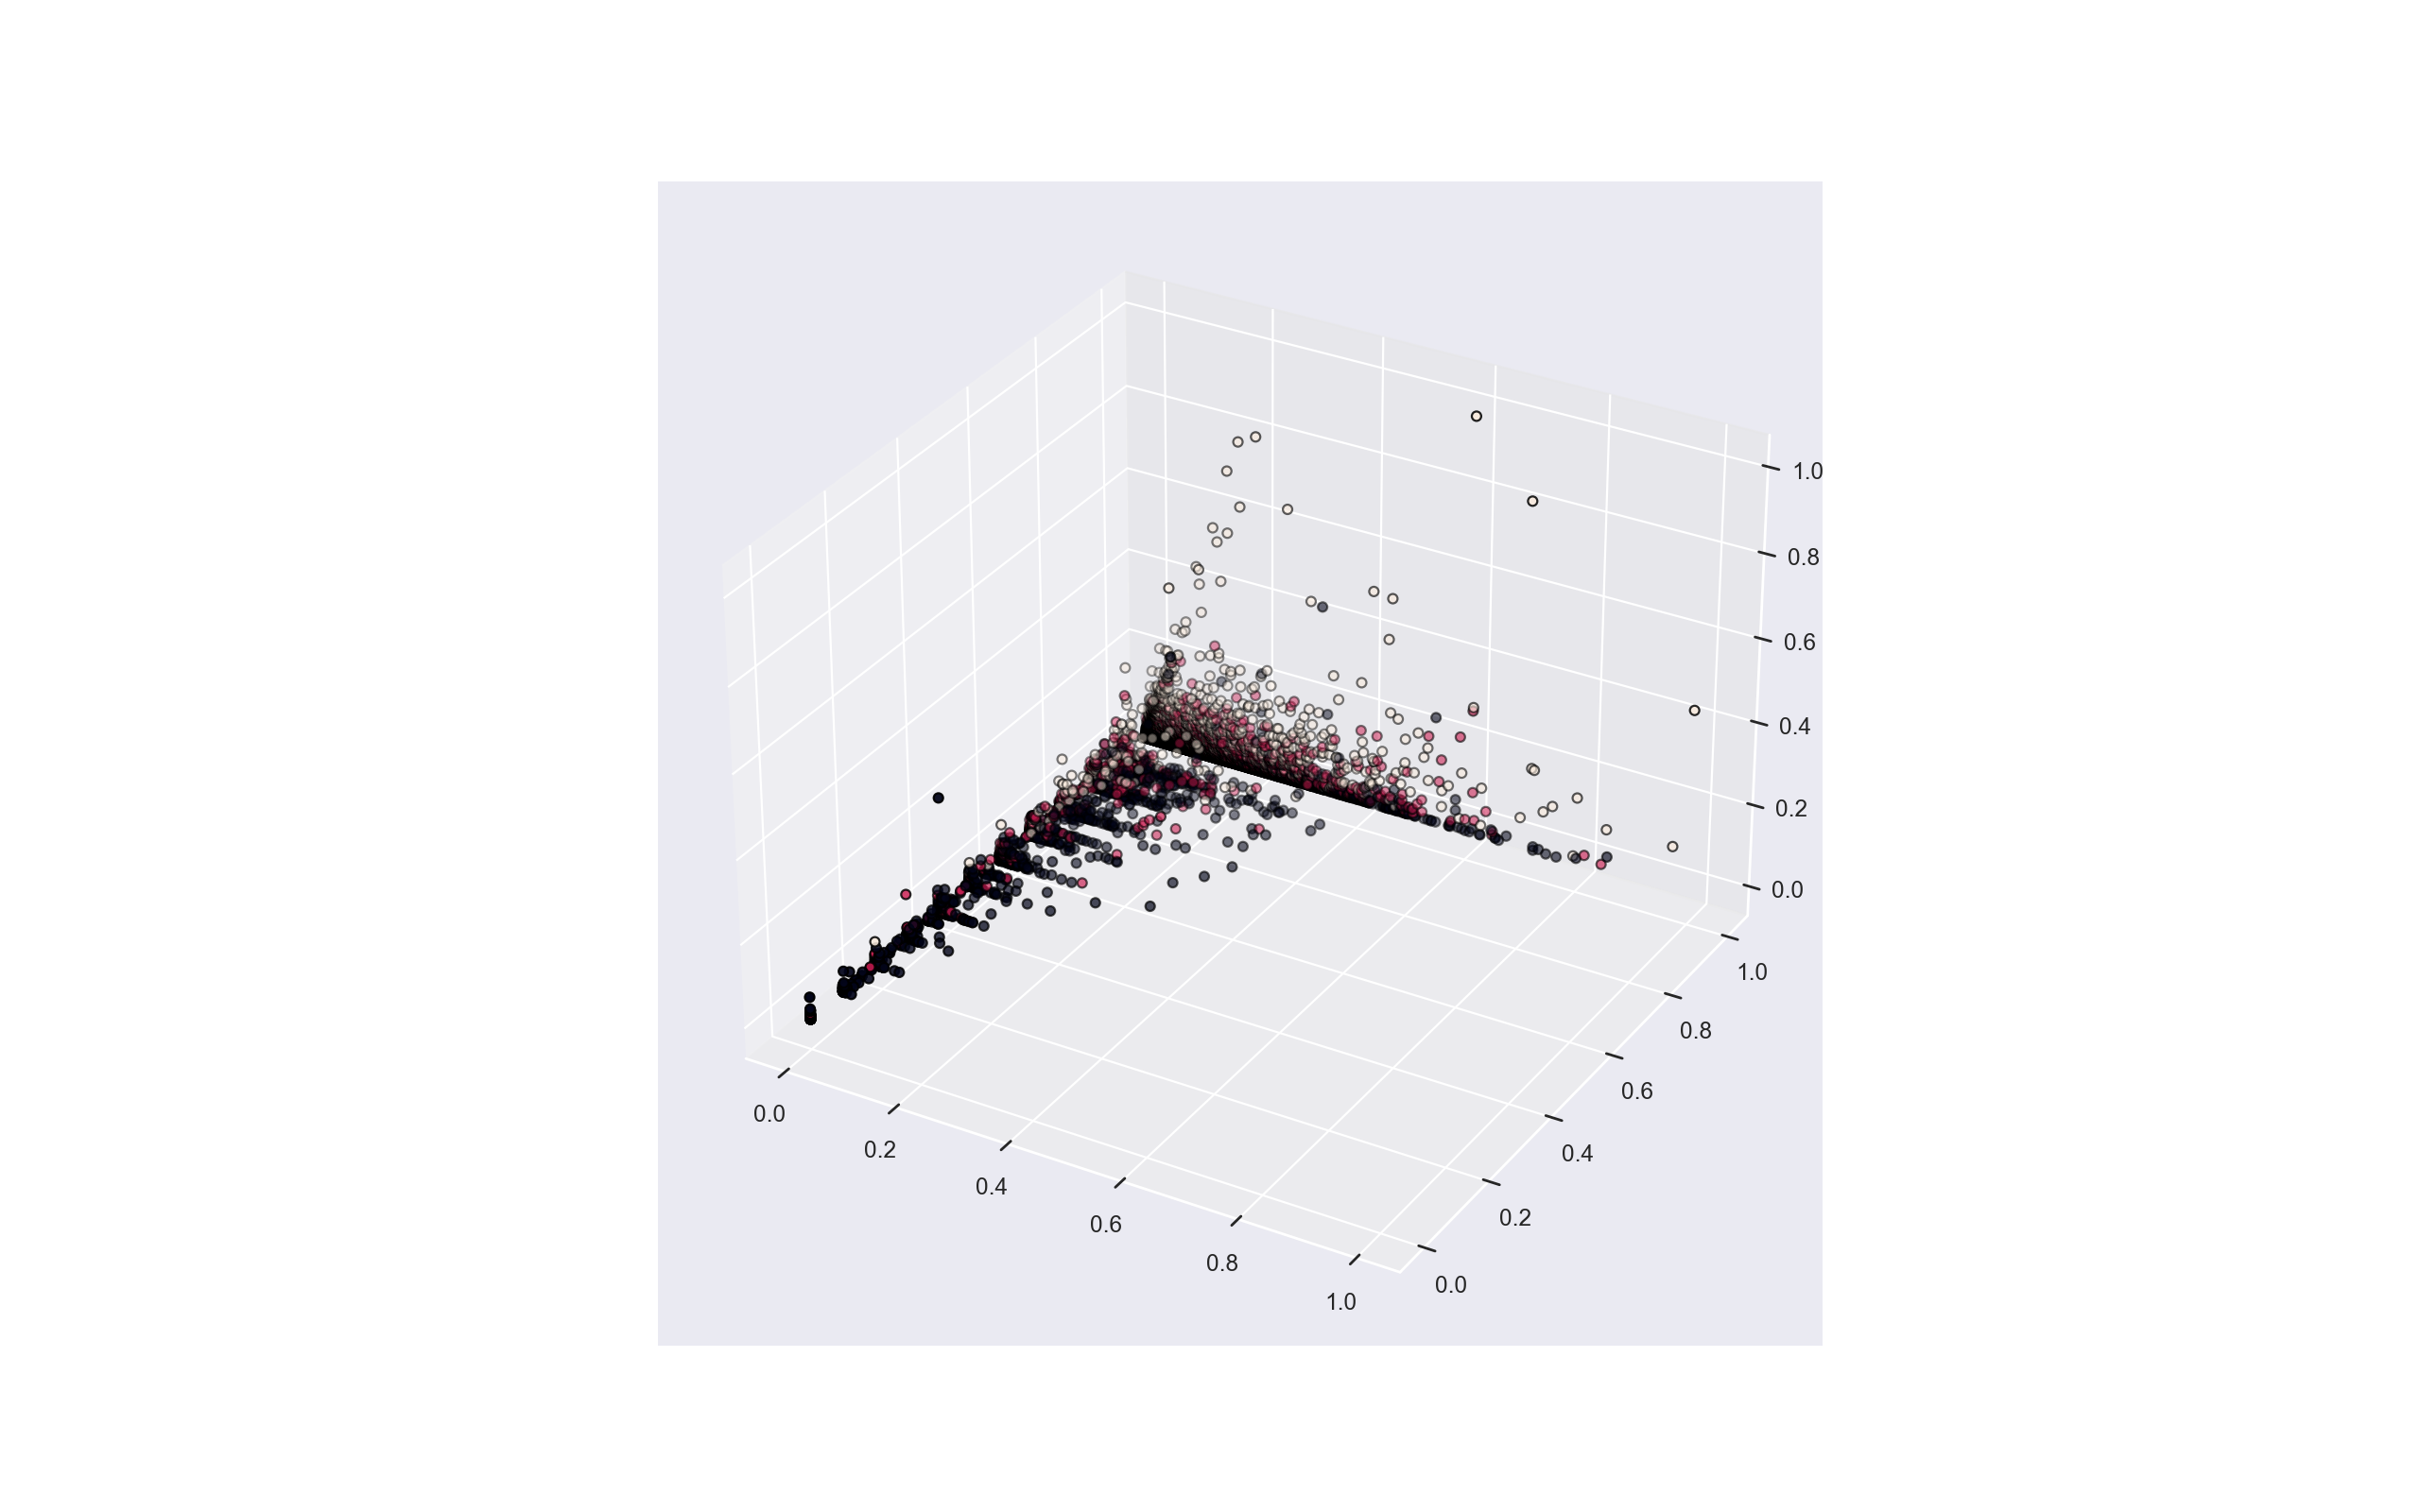

In [23]:
plot_clusters3d(kmeans, X)

By analyzing some insights that refer to the three customer groups that were created by the cluster, 
we can attribute a type of customer and suggest marketing campaigns to the company

<IPython.core.display.Javascript object>


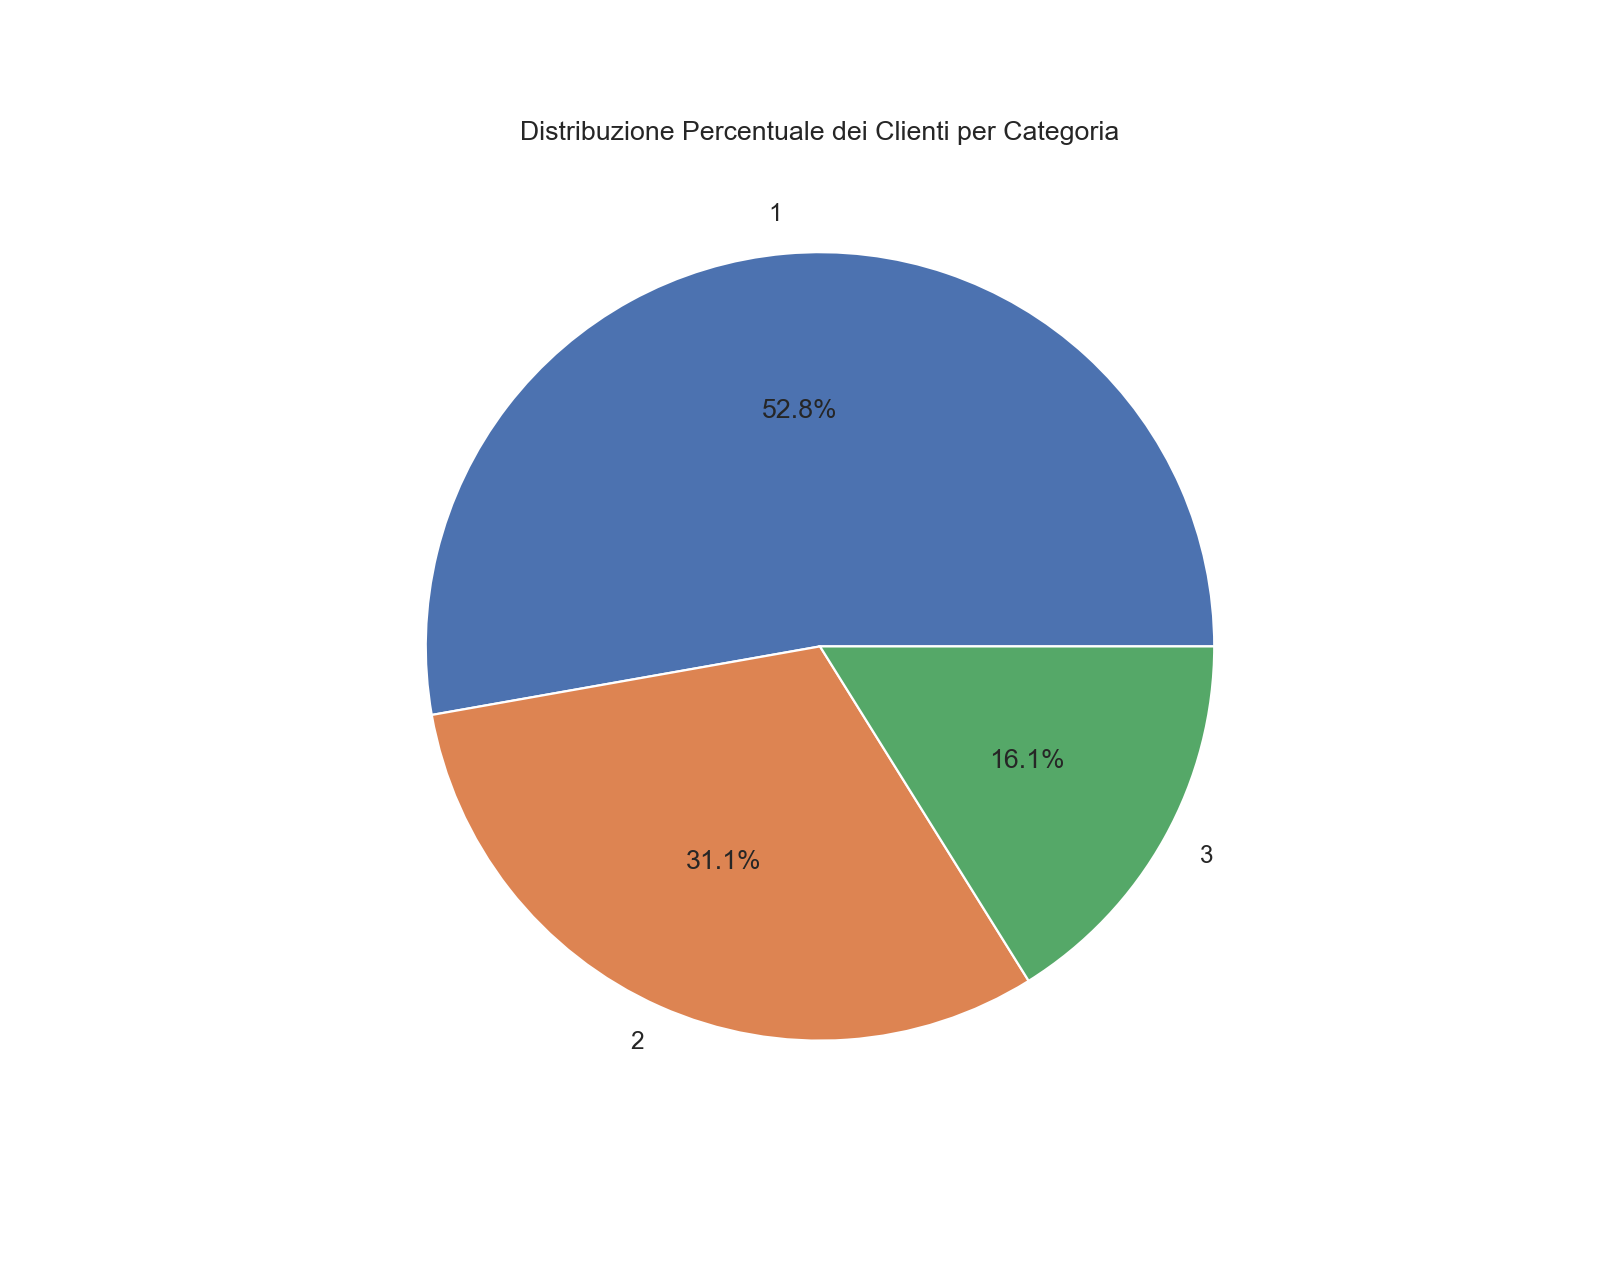

In [24]:
#Calculation of the percentage distribution of customers by category and creation of the pie chart
categoria_counts = df_customer_group['CUSTOMER_GROUP'].value_counts()
categoria_percent = 100 * categoria_counts / len(df_customer_group)


plt.figure(figsize=(10, 8))
plt.pie(categoria_percent, labels=categoria_counts.index, autopct='%1.1f%%')
plt.title('Distribuzione Percentuale dei Clienti per Categoria')
plt.show()

The first pie chart is a quick first observation, it shows the percentage distribution of customers 
for each category. You can see which category has the majority of customers and which has the minority.

<IPython.core.display.Javascript object>


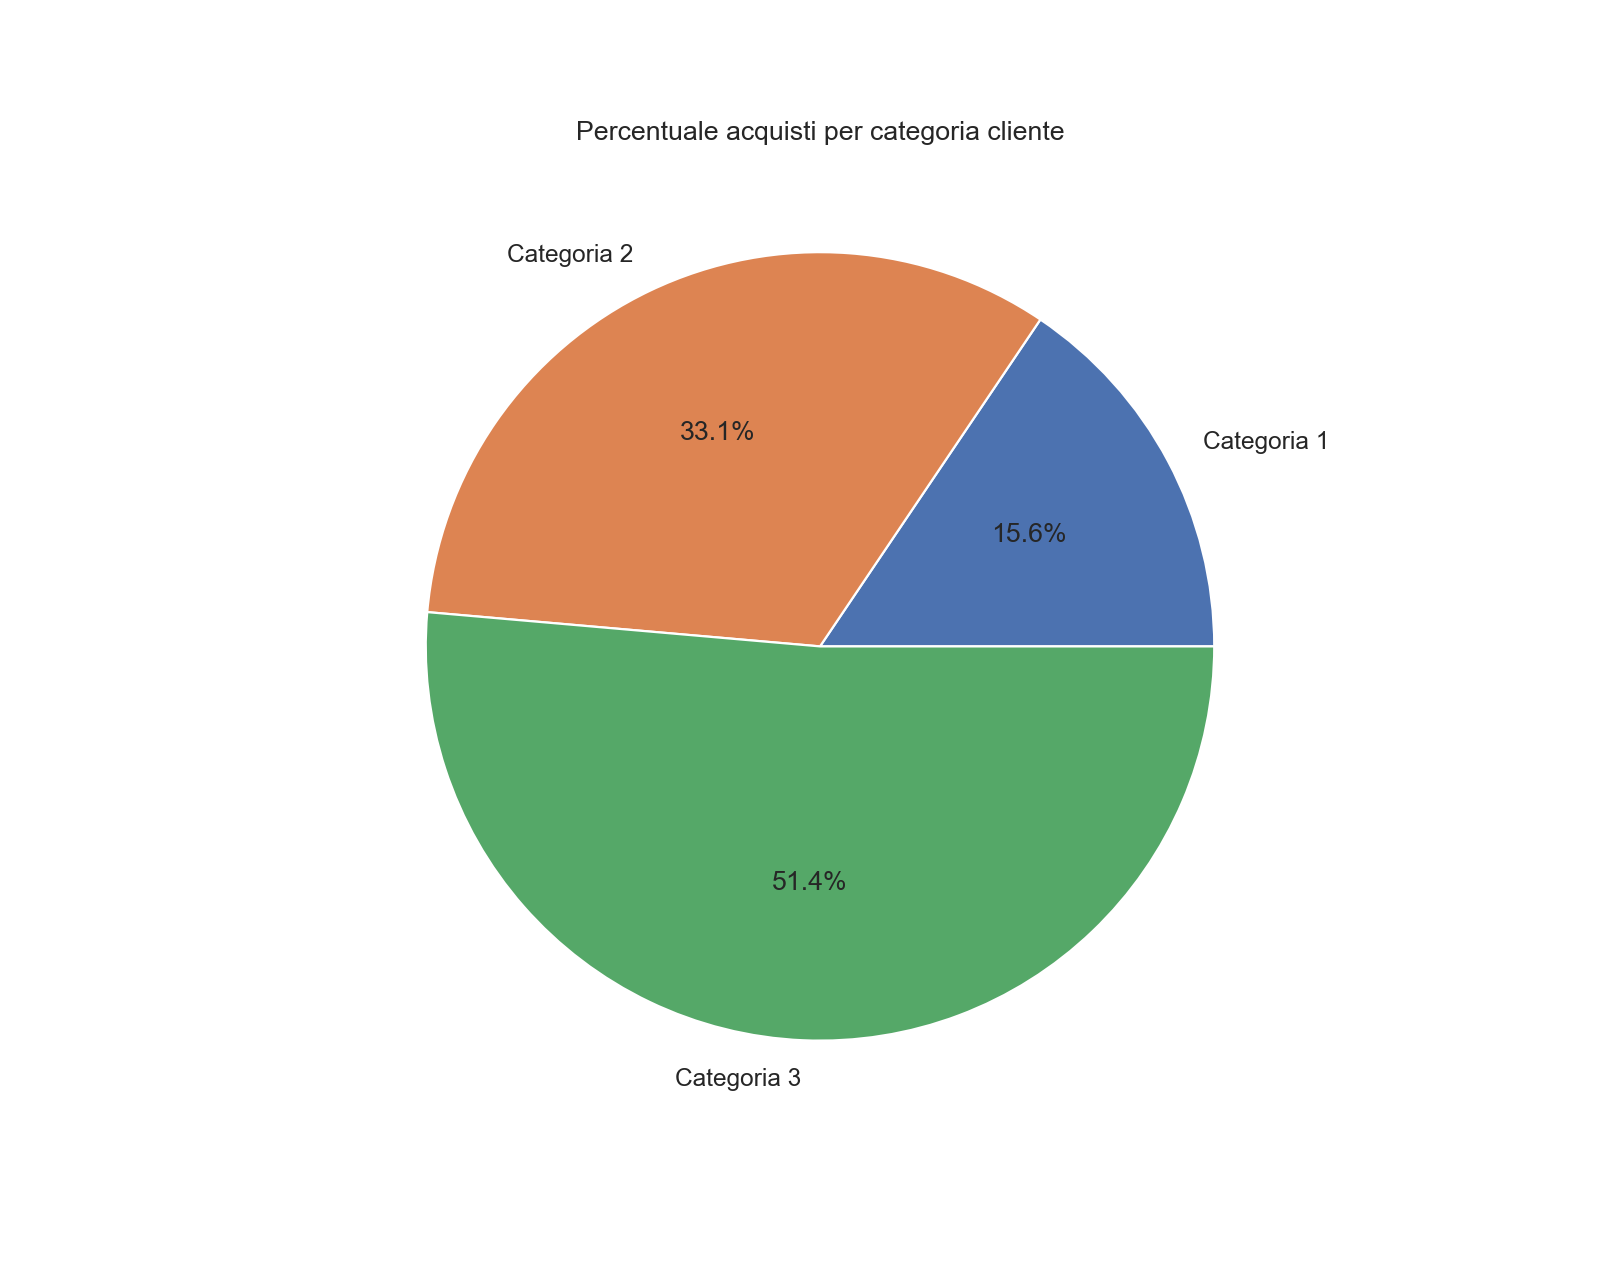

In [25]:
purchases = df_customer_group.groupby('CUSTOMER_GROUP')['PURCHASES'].sum()
labels = ['Categoria 1', 'Categoria 2', 'Categoria 3']

plt.figure(figsize=(10, 8))
plt.pie(purchases, labels=labels, autopct='%1.1f%%',)
plt.title('Percentuale acquisti per categoria cliente')
plt.show()

From the second pie chart,which represents the percentage of purchases by category, 
we can see how "Category 1" is the one that spends the least, 
"Category 2" is in the middle, 
"Category 3", with 51% of purchases, makes over half of the total purchases.

<IPython.core.display.Javascript object>


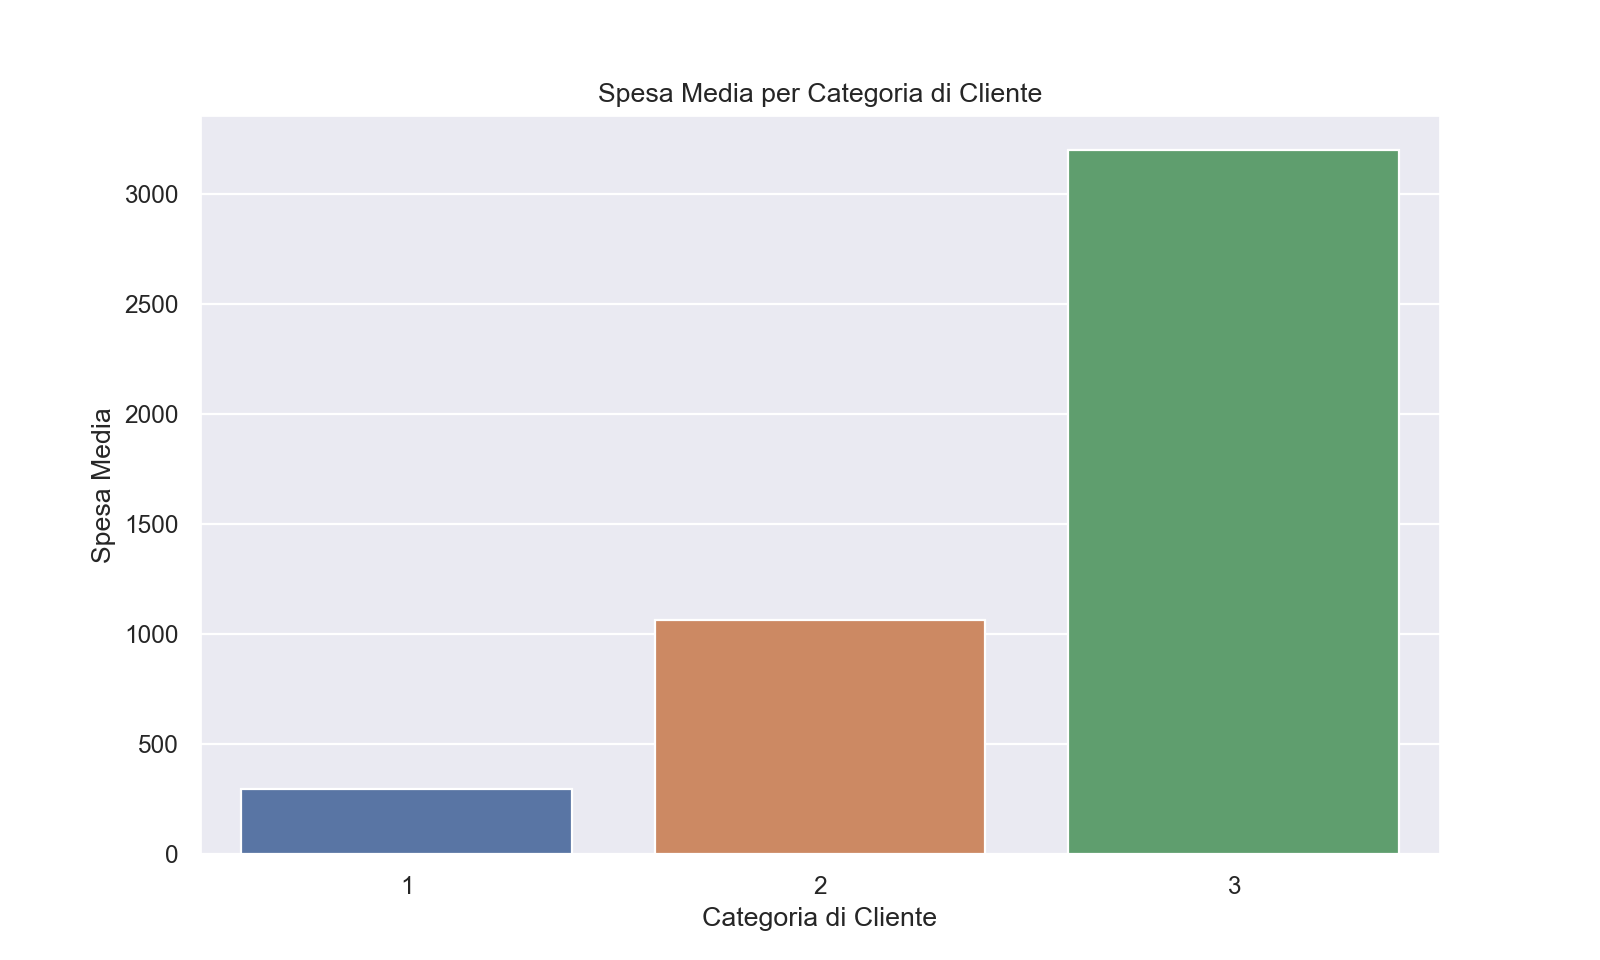

In [26]:
#Calculation of average purchases by category and creation of the bar chart
spesa_media_per_categoria = df_customer_group.groupby('CUSTOMER_GROUP')['PURCHASES'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=spesa_media_per_categoria, x='CUSTOMER_GROUP', y='PURCHASES')
plt.title('Spesa Media per Categoria di Cliente')
plt.xlabel('Categoria di Cliente')
plt.ylabel('Spesa Media')
plt.show()


from this Bar Chart which represents the Average of purchases by Category we can see 
which categories of customers have the highest average spending and which have the lowest.
Category 1 has the lowest purchase average;
Category 2 has a higher average than category 1 but much lower than category 3;
Category 3 has the highest average.
From this graph we can hypothesize that a higher average of purchases could 
indicate more profitable customers or with greater spending needs.

<IPython.core.display.Javascript object>


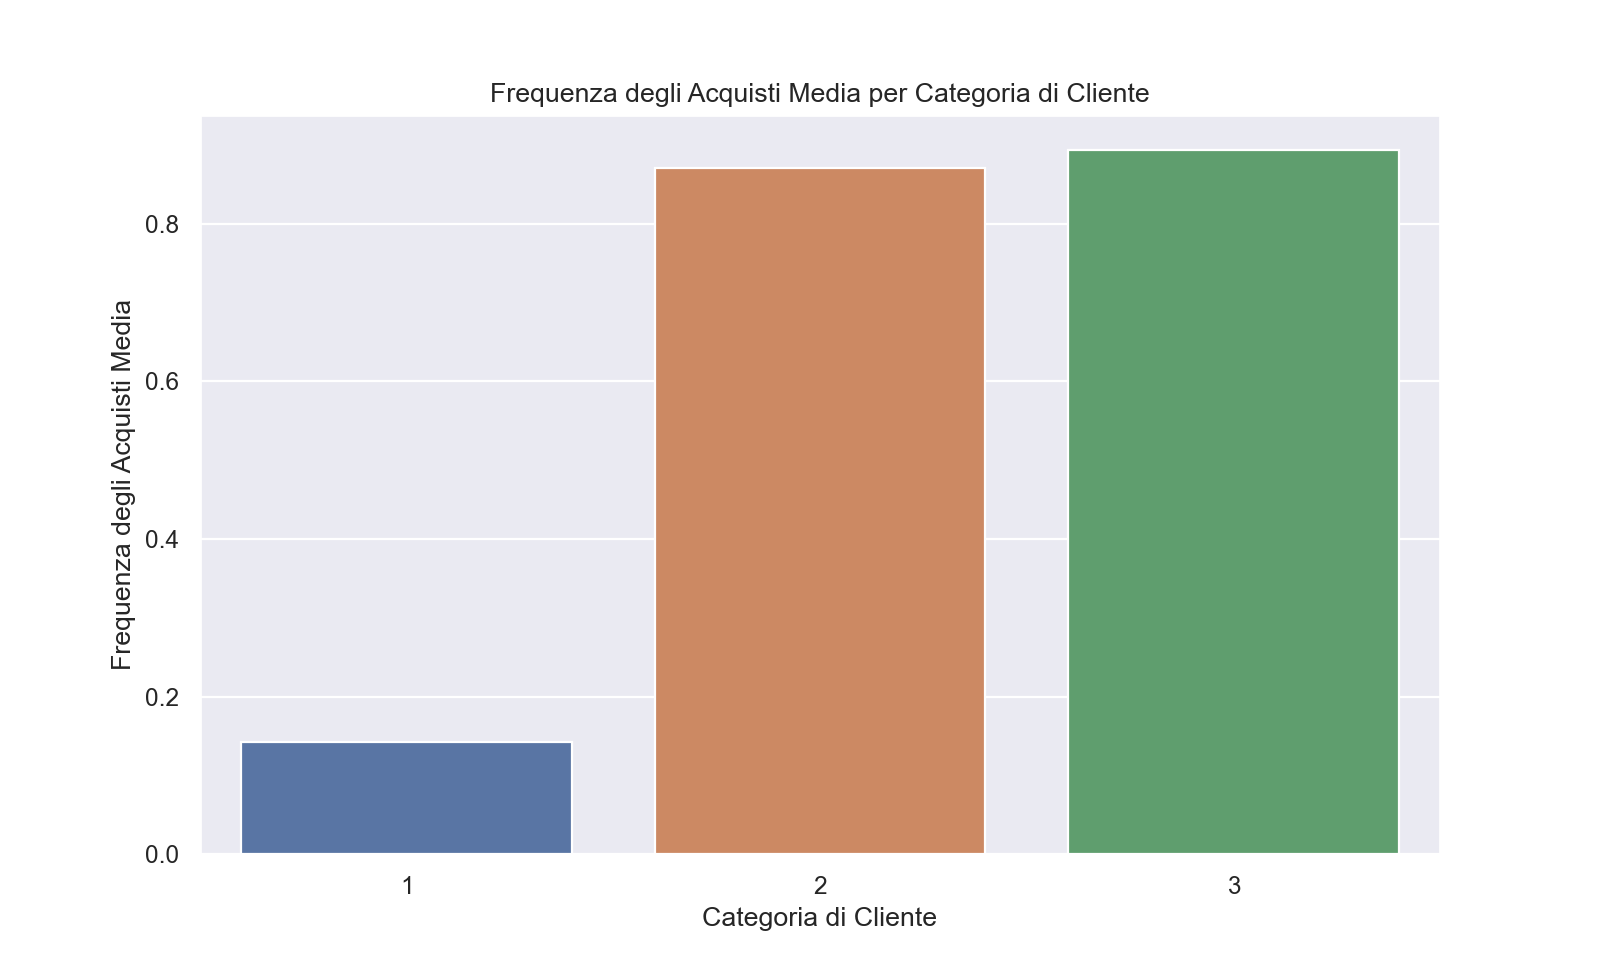

In [27]:
# Calculation of the average purchase frequency by category and creation of the bar chart
frequenza_acquisti_per_categoria = df_customer_group.groupby('CUSTOMER_GROUP')['PURCHASES_FREQUENCY'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=frequenza_acquisti_per_categoria, x='CUSTOMER_GROUP', y='PURCHASES_FREQUENCY')
plt.title('Frequenza degli Acquisti Media per Categoria di Cliente')
plt.xlabel('Categoria di Cliente')
plt.ylabel('Frequenza degli Acquisti Media')
plt.show()

from this Bar Chart which represents Frequency of Purchases by Category,
we can observe which categories of customers make purchases most frequently.
A high frequency could indicate more active and engaged customers.

<IPython.core.display.Javascript object>


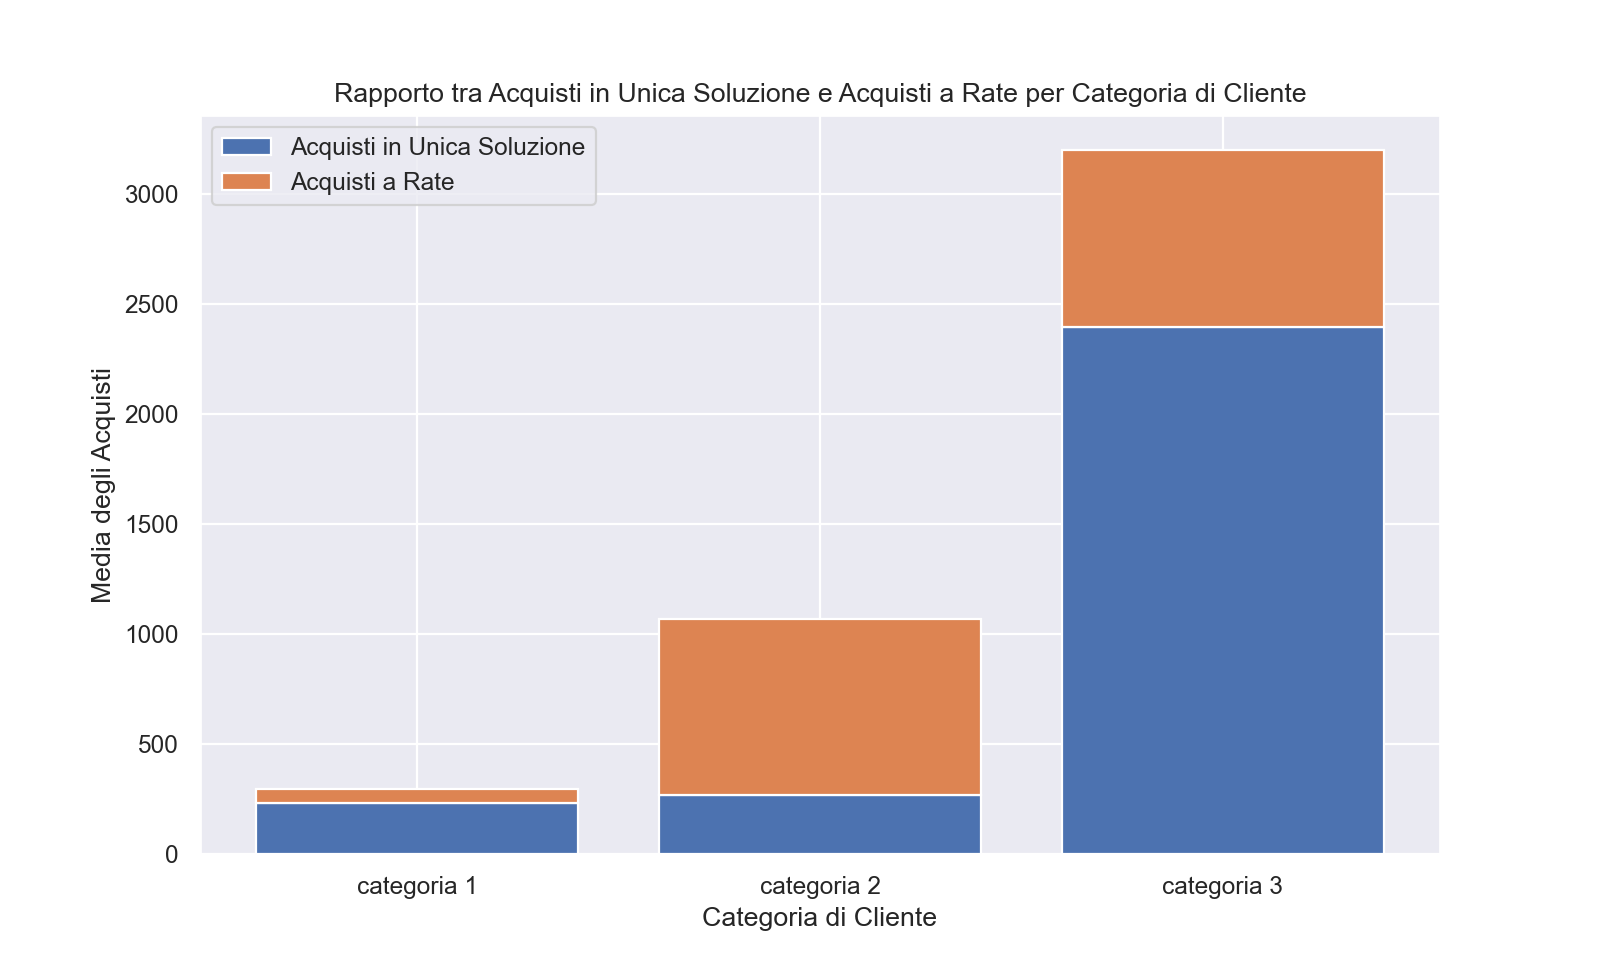

In [33]:
#calculation of the ratio of installment purchases and purchases in a oneoff solution, 
#and creation of the graph
acquisti_per_categoria = df_customer_group.groupby('CUSTOMER_GROUP')[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].mean().reset_index()


top3_categorie = acquisti_per_categoria.head(3)
plt.figure(figsize=(10, 6))

plt.bar(['categoria 1', 'categoria 2', 'categoria 3'], top3_categorie['ONEOFF_PURCHASES'], label='Acquisti in Unica Soluzione')

plt.bar(['categoria 1', 'categoria 2', 'categoria 3'], top3_categorie['INSTALLMENTS_PURCHASES'], bottom=top3_categorie['ONEOFF_PURCHASES'], label='Acquisti a Rate')

plt.title('Rapporto tra Acquisti in Unica Soluzione e Acquisti a Rate per Categoria di Cliente')
plt.xlabel('Categoria di Cliente')
plt.ylabel('Media degli Acquisti')
plt.legend()
plt.show()

This graph clearly shows the purchasing preferences of the three categories 
of customers on the total sales.
Payment in a single solution may indicate a greater available balance on the part of the customer or 
perhaps a trend towards less expensive purchases.
On the contrary, payment in installments may indicate a tendency for a customer to make
more expensive purchases or a larger balance.

In conclusion, after careful observation of the analyzes carried out on some behaviors of the customer categories created by clustering, we can establish that:
- Category 1 is the group that has a lower percentage of purchases, an average expenditure and a lower frequency, compared to the other two groups. Most purchases are made in a single solution, this is evidently because they have a lower cost.
We can therefore establish that category 1 refers to the "SMALL CONSUMER"
- Category 2 refers to 1/3 of all distribution customers, and has 33% of the purchase percentage. It has an average expense that is higher than category 1 but much lower than category 3. Instead, it has a high frequency of purchases, which it mostly makes in instalments.
We can establish that category 2 refers to the "AVERAGE CONSUMER"
- Category 3 is the group that has a higher percentage of purchases, a higher average spend, the highest frequency and the majority of purchases are made in a single solution.
Without a doubt, category 3 refers to the "LARGE CONSUMER"

In [ ]:
df_result['CUSTOMER_GROUP'] = df_customer_group['CUSTOMER_GROUP'].astype(str)
client_mapping = {'1':"SMALL CONSUMER", '2':"AVERAGE CONSUMER", '3':"LARGE CONSUMER"}

df_result['CUSTOMER_GROUP'] = df_result['CUSTOMER_GROUP'].map(client_mapping)
df_result

In [ ]:
df_result.to_excel("customers_segmentation.xlsx", index=False)

Finally, we can change the group number obtained from the clustering, with the label attributed by the analysis, and create an excel table with all the customers and the label that represents them